In [9]:
# paraPropPython time-dependent signal example use of paraPropPython.py notebook
# s. prohira, c. sbrocco

%matplotlib inline
import paraPropPython as ppp
import numpy as np
import matplotlib.pyplot as plt
import util as util

In [10]:
##### time-dependent example #####

### first, initialize an instance of paraProp by defining its dimensions and frequency of interest ###
iceDepth = 35. # m
iceLength = 100. # m
dx = 1 # m
dz = 0.05 # m

freq = 0.15

### it is useful to set the reference depth as the source depth when you only have one transmitter ###
sourceDepth = 30. # m
sim = ppp.paraProp(iceLength, iceDepth, dx, dz, refDepth=sourceDepth, airHeight=1)

### useful arrays for plottinng ###
z = sim.get_z()
x = sim.get_x()

/home/alex/miniconda2/envs/myenv/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


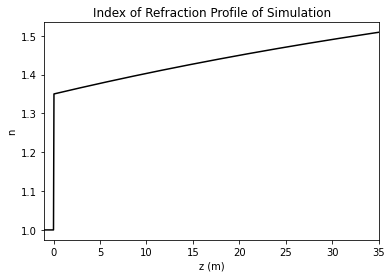

In [11]:
### NOTE: define n before defining source ###

### an example of defining n as a function of z (also can be done using a vector, see implementation) ###
def southpole(z):
    A=1.78
    B=-0.43
    C=-0.0132
    return A+B*np.exp(C*z)
sim.set_n('func', nFunc=southpole)

### plot ###
plt.plot(z, sim.get_n(), color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])

plt.show()

/home/alex/Uni/PhD/Python/paraPropPython/paraPropPython_2Dbackwards/paraPropPython.py:375: ComplexWarning: Casting complex values to real discards the imaginary part
  nPoints = int((centerLmbda0/2) / self.dz)


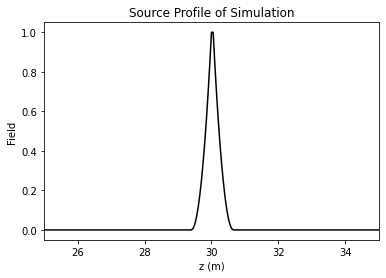

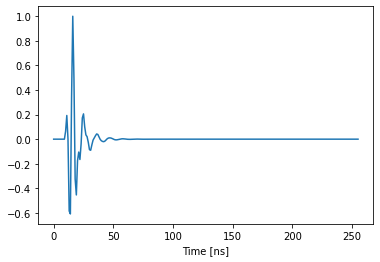

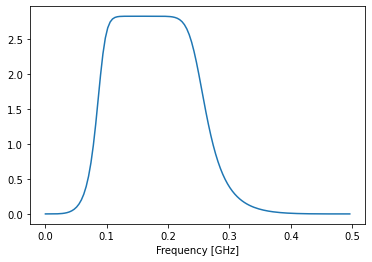

256
256


In [12]:
### an example of defining the source as a dipole ###
### (also can be done using a vector or function like n, see implementation) ###
sim.set_dipole_source_profile(freq, sourceDepth)

### plot, zoomed in ###
plt.plot(z, abs(sim.get_source_profile()), color='black')
plt.ylabel('Field')
plt.xlabel('z (m)')
plt.title('Source Profile of Simulation')
plt.xlim(sourceDepth - 5, sourceDepth + 5)
plt.show()


### set a td signal ###
dt = 1
impulse = np.zeros(2**8, dtype='complex')
impulse[10] = 1+0j
sig = util.normToMax(util.butterBandpassFilter(impulse, 0.09, 0.25, 1/dt, 4))
sim.set_td_source_signal(sig, dt)

t = sim.get_time()
f = sim.get_frequency()
A = sim.get_spectrum()
plt.plot(t, sig.real)
plt.xlabel('Time [ns]')
plt.show()
plt.plot(f, abs(A))
plt.xlabel('Frequency [GHz]')
plt.show()

print(len(impulse))
print(len(sig))

In [13]:
rxList = [ppp.receiver(20, 25)]

### run the solver ###
sim.do_solver(rxList)

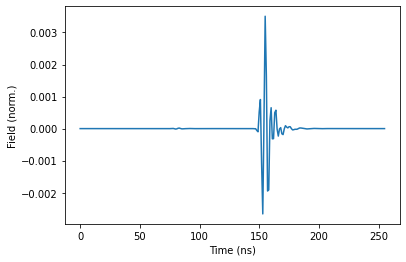

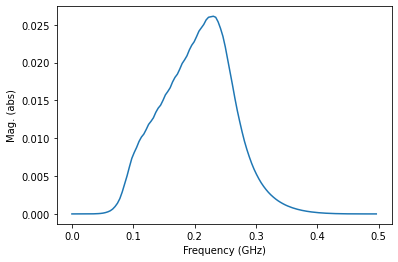

128


In [14]:
rx = rxList[0]
t = rx.get_time()
sig = rx.get_signal().real
f = rx.get_frequency()
spec = rx.get_spectrum()

#wrapped = np.roll(sig, -np.argmax(sig)+45)
#plt.plot(t, wrapped/max(wrapped))
plt.plot(t, sig)
plt.xlabel("Time (ns)")
plt.ylabel("Field (norm.)")
plt.show()
plt.plot(f, abs(spec)) 
plt.xlabel("Frequency (GHz)")
plt.ylabel("Mag. (abs)")
#plt.xlim(0,0.5)
plt.show()

print(len(spec))


/home/alex/miniconda2/envs/myenv/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


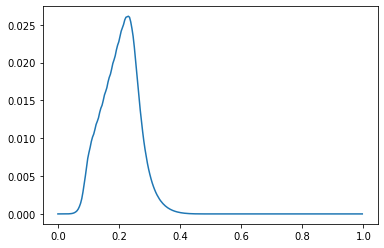

In [15]:
plt.plot(sim.freq, abs(rx.spectrum))